Step-1 Importing the dependencies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
#print("Code is working")

Step-2 Data Collection and Processing

In [8]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv("car data.csv")

In [9]:
#Inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
#Inspecting th last 5 rows of the dataframe
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [11]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [12]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
#checking the number of missing values in our dataset
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Year.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2007     2
2003     2
2018     1
2004     1
Name: count, dtype: int64


Step-3 Encoding the Categorical Data

In [23]:
# Encoding "Fuel_Type" Column
car_dataset["Fuel_Type"] = car_dataset["Fuel_Type"].replace({"Petrol": 0, "Diesel": 1, "CNG": 2}).astype(int)

# Encoding "Seller_Type" Column
car_dataset["Seller_Type"] = car_dataset["Seller_Type"].replace({"Dealer": 0, "Individual": 1}).astype(int)

# Encoding "Transmission" Column
car_dataset["Transmission"] = car_dataset["Transmission"].replace({"Manual": 0, "Automatic": 1}).astype(int)

In [24]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [25]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,1,0,0,0
297,brio,2015,4.00,5.9,60000,0,0,0,0
298,city,2009,3.35,11.0,87934,0,0,0,0
299,city,2017,11.50,12.5,9000,1,0,0,0
300,brio,2016,5.30,5.9,5464,0,0,0,0


Step-4 Splitting the data and target

In [26]:
X = car_dataset.drop(["Car_Name", "Selling_Price"],axis=1) #dropping column axis=1
Y = car_dataset["Selling_Price"]

In [27]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [28]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Step-5 Splitting Training and Test data

In [32]:
#0.1 means 10% -> 90%(training data), 10%(test data)
# Random State - used to ensure reproducibility of results by setting a seed value for the random number generator.
# Why is random_state Important?
# 1. Ensures consistent results → The same code will always produce the same random splits or initialization.
# 2. Helps in debugging → Without random_state, results may vary every time you run the code, making debugging harder.
# 3. Useful in experiments → Keeps train-test splits and model initialization constant for fair comparisons.


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)  

Step-6 Model Training

1. Linear Regression

In [33]:
# Loading the linear regression model
lin_reg_model = LinearRegression()

In [34]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation of Training Data

In [35]:
# Prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [36]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493708


Visualize the actual prices and predicted prices of Training Data

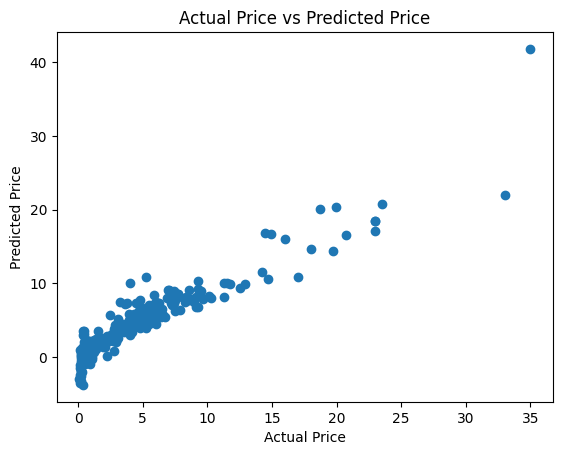

In [38]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Model Evaluation of Test Data

In [42]:
# Prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [40]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715026374


Visualize the actual prices and predicted prices of Test Data

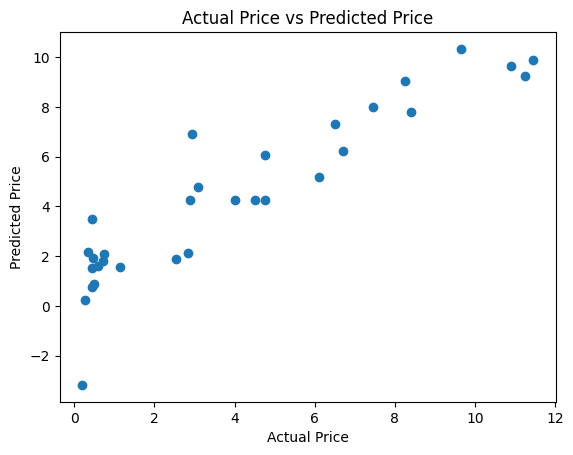

In [43]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

2. Lasso Regression

In [44]:
# Loading the lasso regression model
lass_reg_model = Lasso()

In [45]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation for Training Data

In [54]:
# Prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [58]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


Visualize the actual prices and predicted prices of Training Data

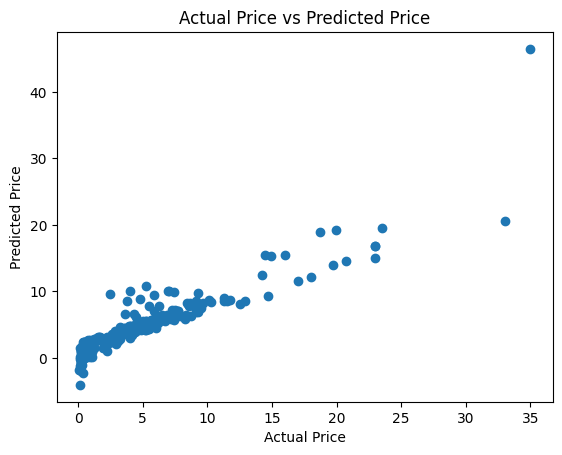

In [59]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Model Evaluation for Test Data

In [49]:
# Prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [50]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


Visualize the actual prices and predicted prices of Test Data

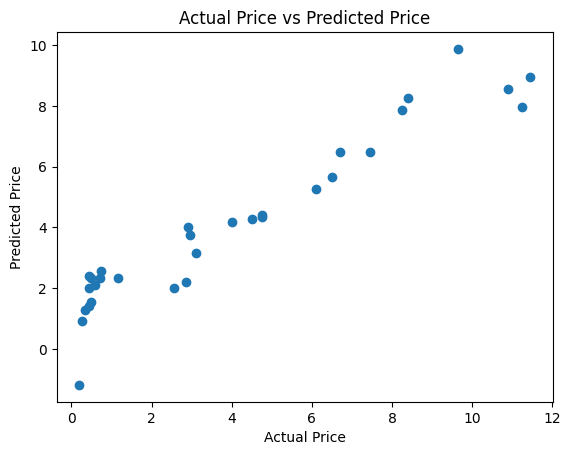

In [51]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()